In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [22]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# merge the 12 months data into single csv file

In [23]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+ file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv('all_sales_data.csv',index = False)

In [24]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [25]:
all_sales_data = pd.read_csv('all_sales_data.csv')
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [63]:
all_sales_data.shape

(185950, 12)

In [64]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int32  
 7   City              185950 non-null  object 
 8   earned            185950 non-null  float64
 9   Hour              185950 non-null  int64  
 10  Minute            185950 non-null  int64  
 11  Count             185950 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 17.7+ MB


### check for null values and drop them

In [26]:
all_sales_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [27]:
all_sales_data.dropna(inplace = True)
all_sales_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### get rid of text in order date column

In [28]:
all_sales_data = all_sales_data[all_sales_data['Order Date'].str[0:2]!='Or']

### Make columns correct type

In [29]:
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered'])
all_sales_data['Price Each'] = pd.to_numeric(all_sales_data['Price Each'])

## Augment data with additional columns

### Add month column

In [30]:
all_sales_data['month'] = all_sales_data['Order Date'].str[0:2]
all_sales_data['month'] = all_sales_data['month'].astype('int32')
all_sales_data['month'].unique()

array([12,  1,  4,  5,  2,  3,  8,  9,  6, 11, 10,  7], dtype=int32)

In [32]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### add city column

In [33]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_sales_data['City'] = all_sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA)


# EDA

#### Question 1: What was the best month for earning? How much was earned that month?

In [36]:
all_sales_data['earned'] = all_sales_data['Price Each'].astype('float') * all_sales_data['Quantity Ordered'].astype('int')
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,earned
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95


In [38]:
all_sales_data.groupby(['month']).sum()

,Quantity Ordered,Price Each,earned
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


range(1, 13)


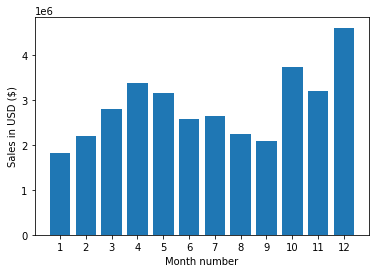

In [46]:

months = range(1,13)
print(months)

plt.bar(months,all_sales_data.groupby(['month']).sum()['earned'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


#### so december has maximum earning

#### Question 2: Which city has most earning?

In [71]:
all_sales_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,month,earned,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932,14881
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060,9905
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442,19934
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155,14820
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638,29605
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598,24876
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856,2455
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533,10010
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477,44732


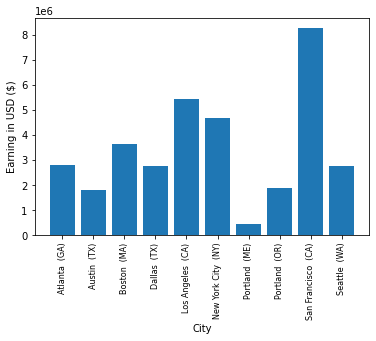

In [70]:

keys = [city for city, df in all_sales_data.groupby(['City'])]

plt.bar(keys,all_sales_data.groupby(['City']).sum()['earned'])
plt.ylabel('Earning in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### so San Fransisco city has most earning

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [53]:
all_sales_data['Hour'] = pd.to_datetime(all_sales_data['Order Date']).dt.hour
all_sales_data['Minute'] = pd.to_datetime(all_sales_data['Order Date']).dt.minute
all_sales_data['Count'] = 1
all_sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,earned,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,12,38,1


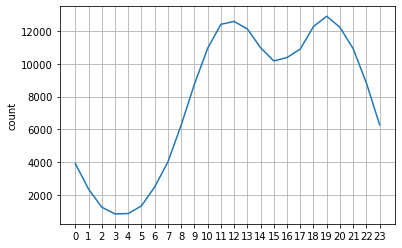

In [67]:
keys = [pair for pair, df in all_sales_data.groupby(['Hour'])]

plt.plot(keys, all_sales_data.groupby(['Hour']).count()['Count'])
plt.ylabel('count')
plt.xticks(keys)
plt.grid()
plt.show()


#### so we should show advertisement near 11am or near 7pm

#### What product sold the most? Why do you think it sold the most?


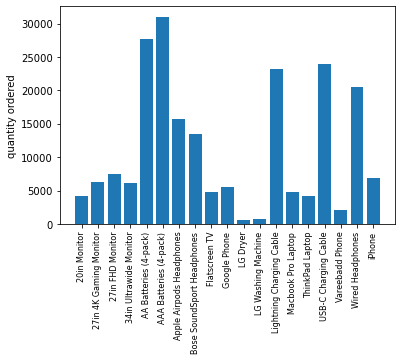

In [66]:
product_group = all_sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.ylabel('quantity ordered')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### so most sold items are batteries

<ipython-input-58-8133abba415e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-58-8133abba415e>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


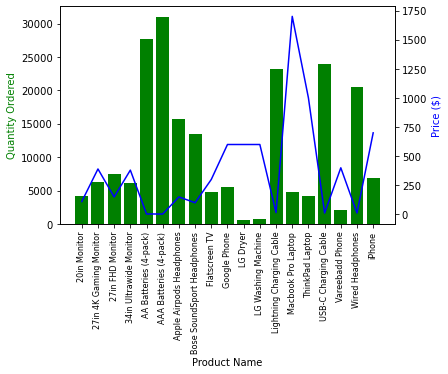

In [58]:
prices = all_sales_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### so the reason for most sold items is mostly price of the item.

#### What is the total earning of the year?

In [62]:
all_sales_data['earned'].sum()

34492035.97

#### so the total revenue generated in year is 34492035.97$
